In [311]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pytesseract as pt

In [312]:
import tensorflow as tf

# Load the model
model_save_path = r"C:\Users\Mostafa\Desktop\Project_Files\1_Labeling\object_detection.h5"
model = tf.keras.models.load_model(model_save_path)
print('Model loaded successfully')



Model loaded successfully


In [314]:
path = r"C:\Users\Mostafa\Downloads\Module_2_Object_dection\test_images\N56.jpeg"
image = load_img(path) # PIL object
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output

In [315]:
# size of the orginal image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 417
Width of the image = 769


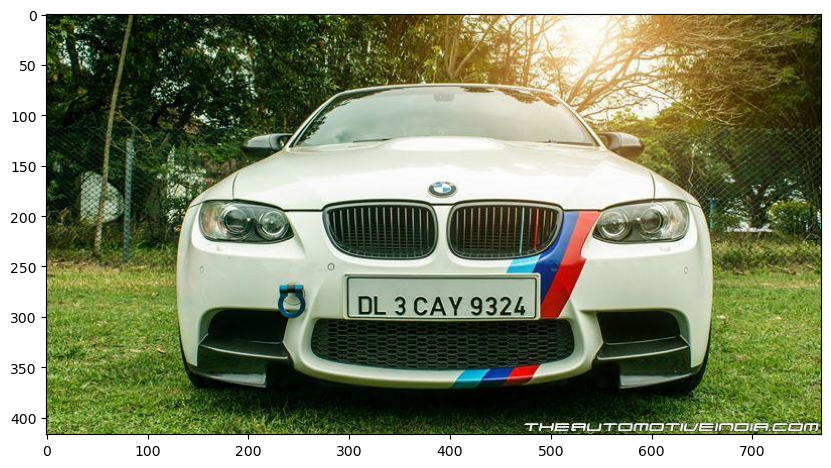

In [319]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [320]:
image_arr_224.shape

(224, 224, 3)

In [323]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [325]:
# make predictions
coords = model.predict(test_arr)
coords

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


array([[0.40635523, 0.6545471 , 0.62739325, 0.7260333 ]], dtype=float32)

In [326]:
# denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[312.48717341, 503.34671628, 261.62298346, 302.75587374]])

In [327]:
coords = coords.astype(np.int32)
coords

array([[312, 503, 261, 302]])

(312, 261) (503, 302)


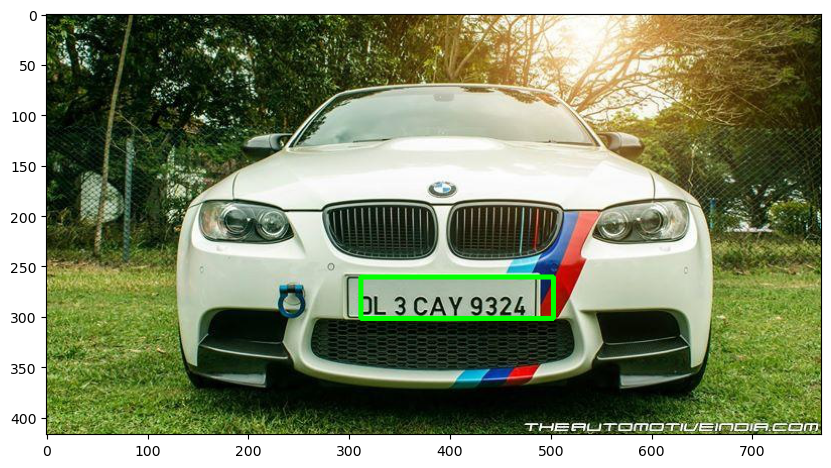

In [331]:
# draw bounding on top the image
xmin, xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [332]:
# create pipeline
path = r"C:\Users\Mostafa\Downloads\Module_2_Object_dection\test_images\N137.jpeg"
def object_detection(path):
    # read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    # data preprocessing
    image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    # make predictions
    coords = model.predict(test_arr)
    # denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    # draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
(313, 323) (506, 377)


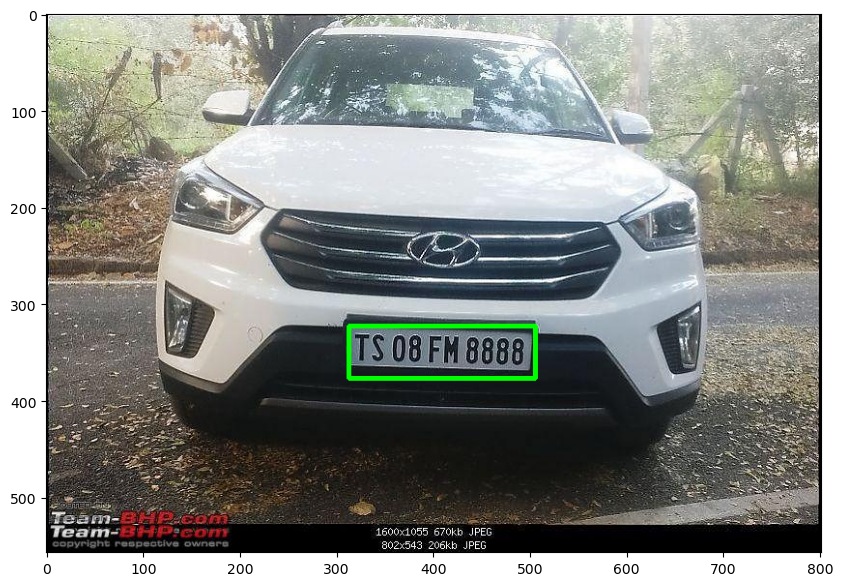

In [335]:
path =r"C:\Users\Mostafa\Downloads\Project_Files (1)\1_Labeling\images\N121.jpeg"
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
(169, 166) (342, 196)


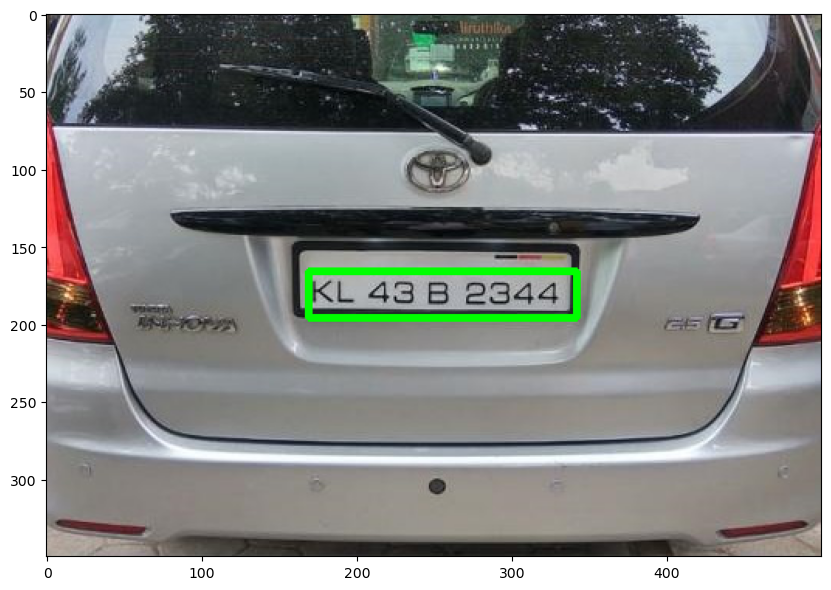

In [345]:
path = r"C:\Users\Mostafa\Downloads\Module_2_Object_dection\test_images\N67.jpeg"
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()


In [346]:
img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

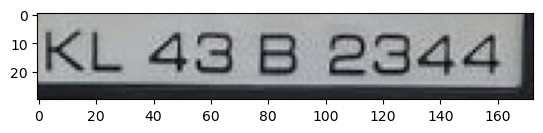

In [349]:
plt.imshow(roi)
plt.show()

In [351]:
# extract text from image
text = pt.image_to_string(roi)
print(text)

KL 43 B 2344]

